[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[Text(0.5, 1.0, 'Cumulative returns\nS&P500 vs Portflio')]

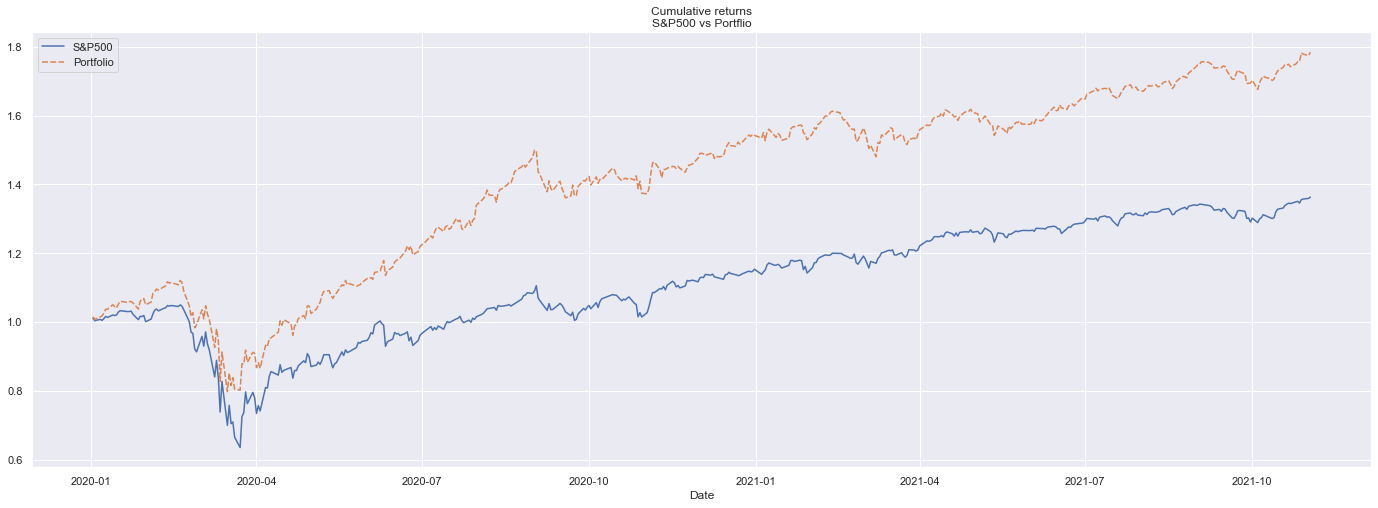

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import plotter
import metrics
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

weights = [0.3, 0.1, 0.05, 0.05, 0.1, 0.15, 0.15]
tickers = ['QQQ', 'AMZN', 'NVDA', 'BTC-USD', 'AAPL', 'YNDX', 'EPAM']

assets = yf.download(tickers, start='2020-01-01')['Adj Close'].dropna()
portfolio = pd.Series(metrics.portfolio_return_series(assets, weights))
portfolio.name = 'Portfolio'
benchmark = pd.Series(np.log(metrics.benchmark(assets) / metrics.benchmark(assets).shift(1)).dropna().cumsum())
portfolio.index = assets.index[1:]
data_before = pd.concat([benchmark, portfolio], axis=1).dropna()

plotter.cumulative_returns_plot(data_before)

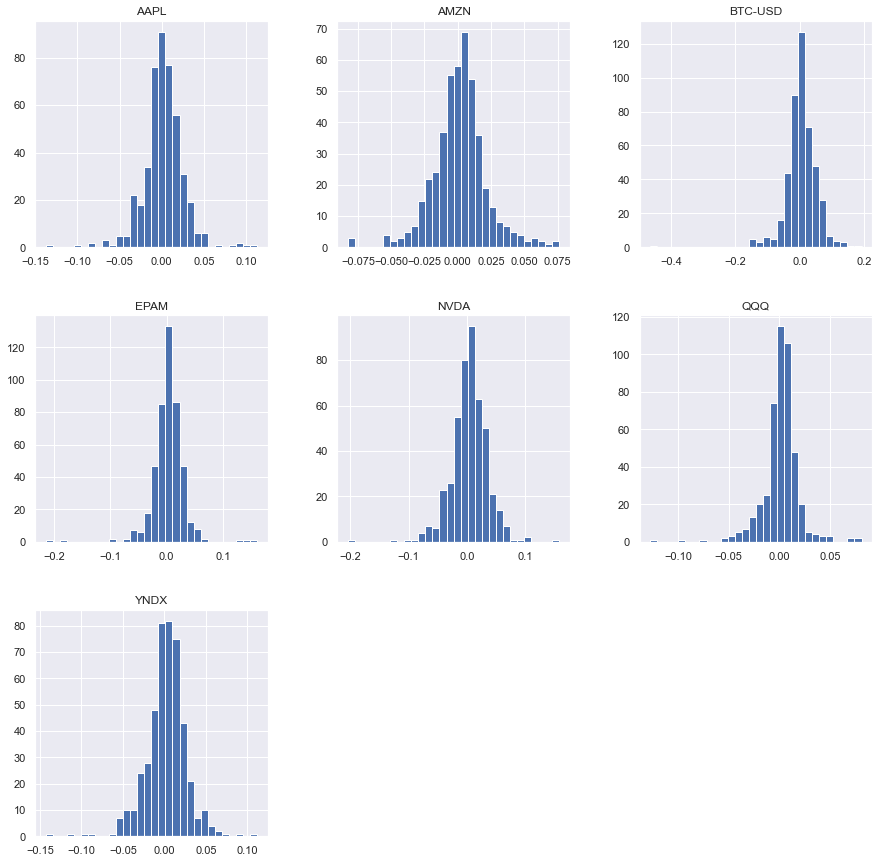

In [2]:
plotter.distribution(assets)

[Text(0.5, 1.0, 'Historical drawdowns')]

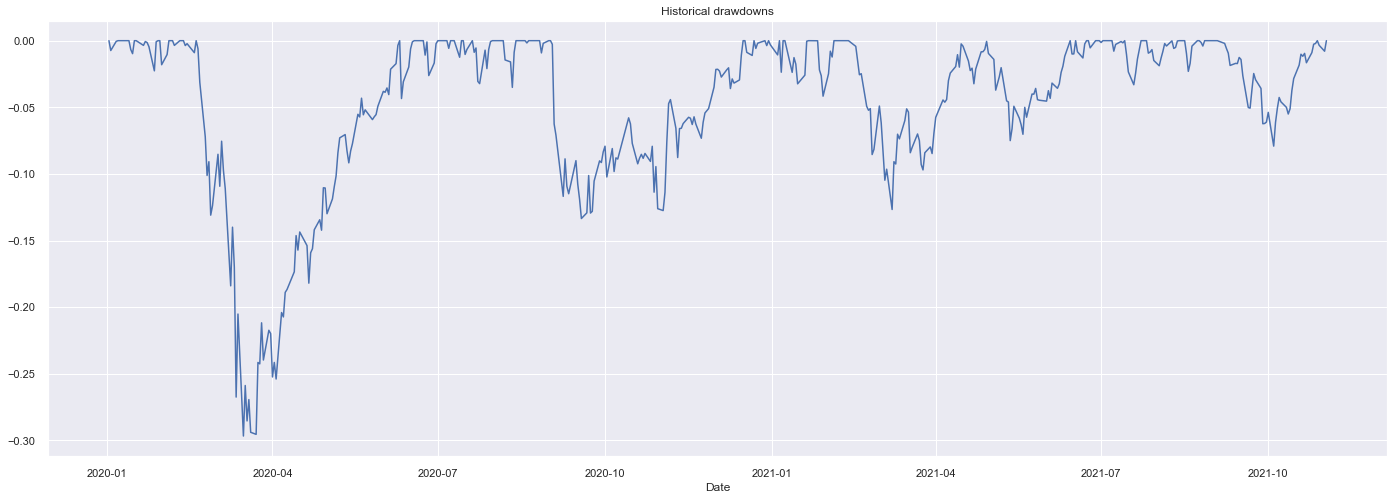

In [3]:
plotter.drawndowns(assets, weights)

[Text(0, 0.5, 'Return'),
 Text(0.5, 0, 'Volatility'),
 Text(0.5, 1.0, 'Effecient frontier')]

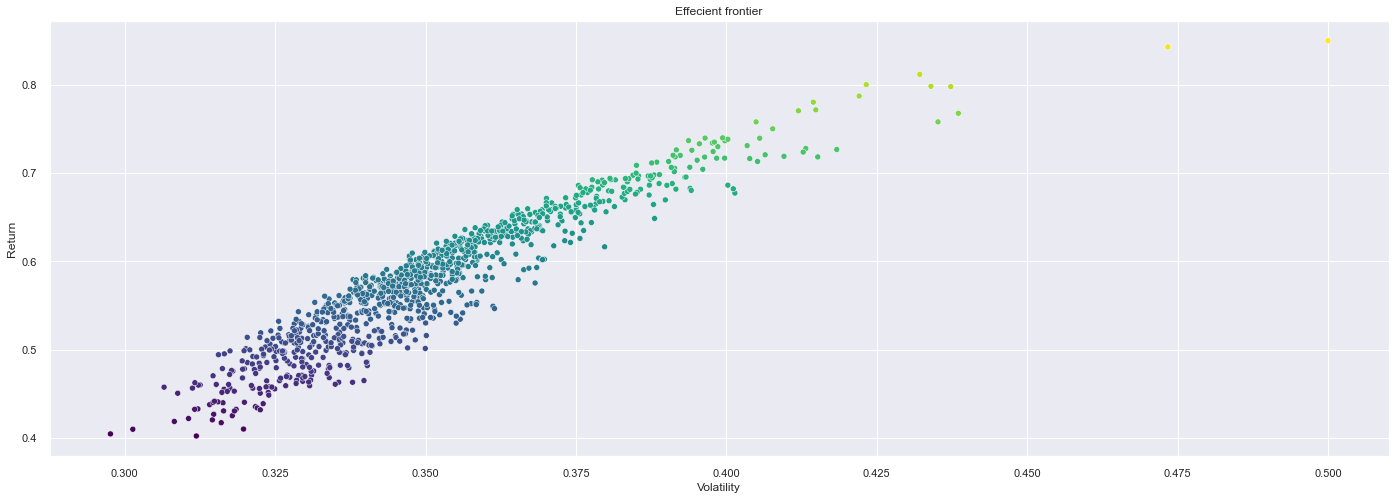

In [4]:
plotter.effecient_frontier(assets, num_ports=1000)

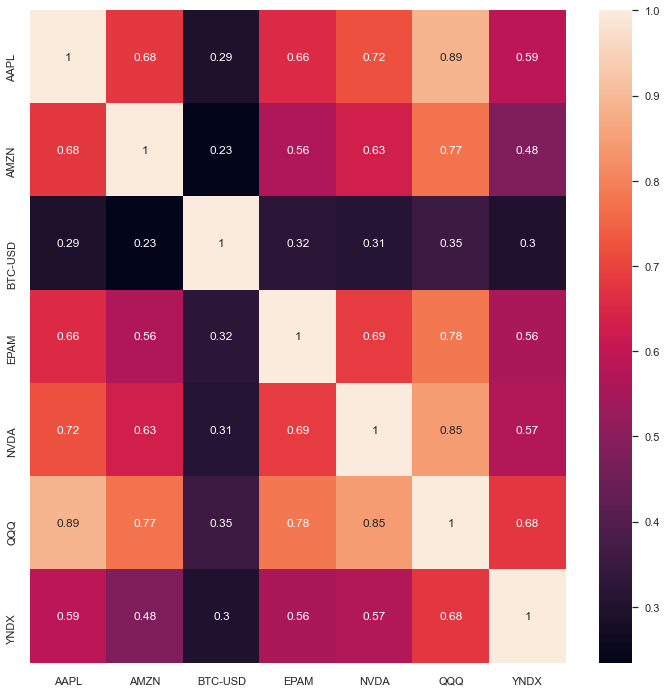

In [5]:
plotter.heatmap(assets)

In [6]:
metrics.get_all_table(assets, weights)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Total Return                        78.4%
Annualized Return                   37.2%
Annualized Volatility               0.676
Alpha                               0.432
Beta                                0.967
Historical VaR                      0.039
Sharpe Ratio (highest possible)     1.912
Sortino Ratio                      12.402
Treynor Ratio                       0.795
dtype: object

In [7]:
max_sharpe = metrics.sharpe_ratio_generator(assets, number_port=1000)
max_sharpe

Maximizing returns and minimizing volatility


,Sharpe Ratios,Volatility,Weights
822,1.818126,0.388175,"[0.012884037854026495, 0.13154580067532226, 0...."


In [8]:
weights = max_sharpe['Weights']
weights = weights.tolist()

In [16]:
print('Updated weights', weights)

Updated weights [array([0.01288404, 0.1315458 , 0.22273564, 0.26354655, 0.23651653,
       0.00412101, 0.12865043])]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[Text(0.5, 1.0, 'Cumulative returns\nS&P500 vs Portflio')]

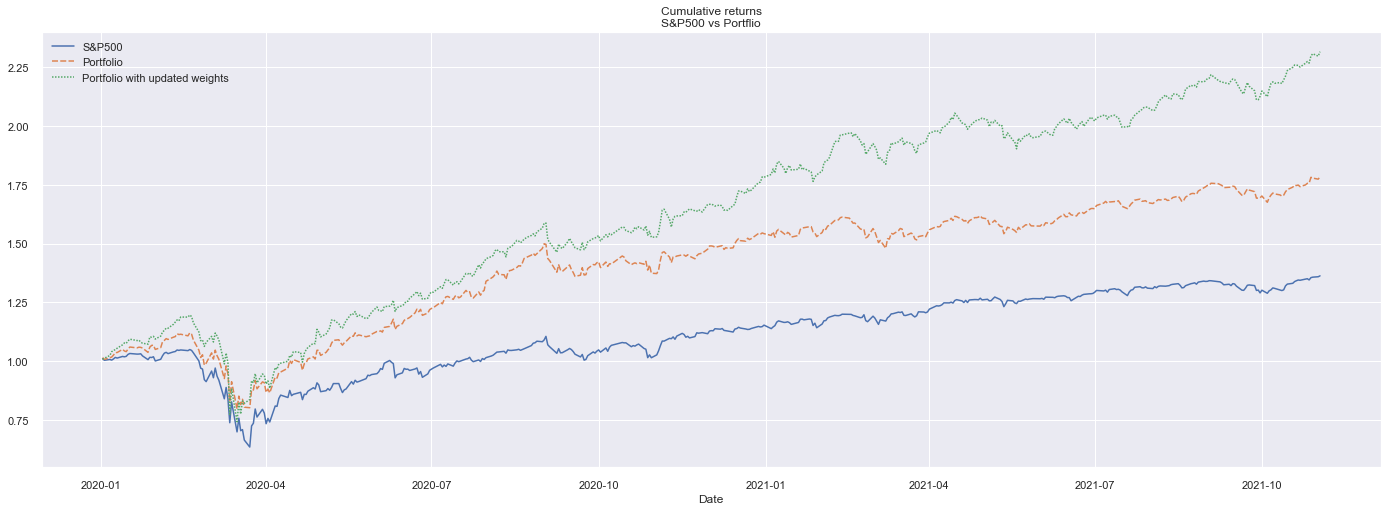

In [15]:
portfolio = pd.Series(metrics.portfolio_return_series(assets, weights[0]))
portfolio.name = 'Portfolio with updated weights'
benchmark = pd.Series(np.log(metrics.benchmark(assets) / metrics.benchmark(assets).shift(1)).dropna().cumsum())
portfolio.index = assets.index[1:]
plot_data = pd.concat([data_before, portfolio], axis=1).dropna()
plotter.cumulative_returns_plot(data=plot_data)